In [1]:
import pandas as pd
import re
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
#read data
hulu = pd.read_csv('hulu_titles.csv')
hulu

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...
...,...,...,...,...,...,...,...,...,...,...,...,...
3068,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,NaN,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...
3069,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,NaN,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...
3070,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,NaN,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...
3071,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,NaN,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...


In [3]:
hulu.describe()

,cast,release_year
count,0.0,3073.000000
mean,NaN,2012.567524
std,NaN,10.844069
min,NaN,1923.000000
25%,NaN,2010.000000
50%,NaN,2016.000000
75%,NaN,2019.000000
max,NaN,2021.000000


In [4]:
#overview
hulu.dtypes

show_id          object
type             object
title            object
director         object
cast            float64
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description      object
dtype: object

In [5]:
hulu.shape

(3073, 12)

In [6]:
hulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3073 non-null   object 
 1   type          3073 non-null   object 
 2   title         3073 non-null   object 
 3   director      3 non-null      object 
 4   cast          0 non-null      float64
 5   country       1620 non-null   object 
 6   date_added    3045 non-null   object 
 7   release_year  3073 non-null   int64  
 8   rating        2553 non-null   object 
 9   duration      2594 non-null   object 
 10  listed_in     3073 non-null   object 
 11  description   3069 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 288.2+ KB


In [7]:
hulu.nunique()

show_id         3073
type               2
title           3073
director           3
cast               0
country          150
date_added      1115
release_year      72
rating            88
duration         135
listed_in        442
description     3057
dtype: int64

In [9]:
hulu.isnull().values.any()

True

In [10]:
hulu.isnull().sum().sum()

8627

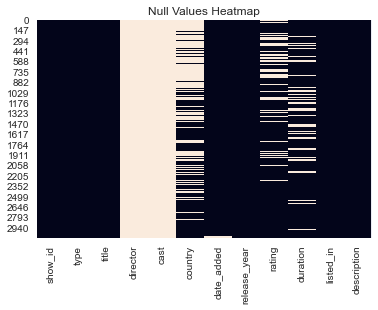

In [11]:
sns.heatmap(hulu.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [12]:
hulu.isnull().sum()

show_id            0
type               0
title              0
director        3070
cast            3073
country         1453
date_added        28
release_year       0
rating           520
duration         479
listed_in          0
description        4
dtype: int64

In [13]:
hulu['director'].fillna('No Director', inplace=True)
hulu['cast'].fillna('No Cast', inplace=True)
hulu['country'].fillna('Country Unavailable', inplace=True)
hulu.dropna(subset=['date_added','rating'],inplace=True)

In [14]:
hulu.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration         True
listed_in       False
description      True
dtype: bool

In [15]:
hulu_shows = hulu[hulu['type']=='TV Show'].copy()
hulu_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,Queens,No Director,No Cast,Country Unavailable,"October 20, 2021",2021,TV-14,1 Season,"Drama, Music",Four women in their 40s reunite for a chance t...
9,s10,TV Show,The Bachelorette,No Director,No Cast,United States,"October 20, 2021",2003,TV-14,3 Seasons,"Reality, Romance",ABC's romance reality show lets one lucky lady...
14,s15,TV Show,Home Sweet Home,No Director,No Cast,Country Unavailable,"October 16, 2021",2021,TV-PG,1 Season,Reality,Real families of different backgrounds experie...
16,s17,TV Show,Showtime Championship Boxing: Wilder vs. Molina,No Director,No Cast,Country Unavailable,"October 16, 2021",2015,TV-14,1 Season,Sports,Champion Deontay Wilder vs. Eric Molina. Live ...
17,s18,TV Show,America's Book of Secrets,No Director,No Cast,United States,"October 15, 2021",2012,TV-14,1 Season,"Documentaries, History",America's story can be told in many ways. Whil...


In [16]:
hulu_movies = hulu[hulu['type']=='Movie'].copy()
hulu_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,No Director,No Cast,Country Unavailable,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
2,s3,Movie,The Marksman,No Director,No Cast,Country Unavailable,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,No Director,No Cast,Country Unavailable,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
11,s12,Movie,Dream Horse,No Director,No Cast,Country Unavailable,"October 18, 2021",2020,PG,113 min,"Comedy, Drama",The film tells the inspiring true story of a s...
20,s21,Movie,Cheer Camp Killer,No Director,No Cast,Country Unavailable,"October 15, 2021",2020,TV-14,87 min,Thriller,Camp queen bee Victoria does not take kindly t...


C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


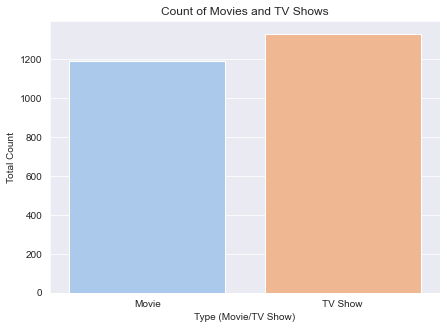

In [17]:
plt.figure(figsize=(7,5))
g = sns.countplot(hulu.type, palette="pastel");
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

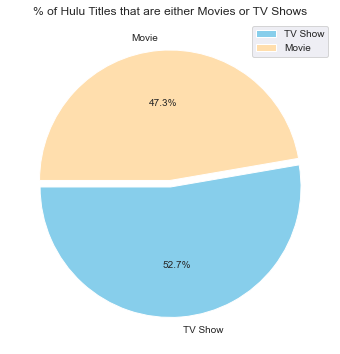

In [19]:
plt.figure(figsize=(12,6))
plt.title("% of Hulu Titles that are either Movies or TV Shows")
g = plt.pie(hulu.type.value_counts(), explode=(0.025,0.025), labels=hulu.type.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


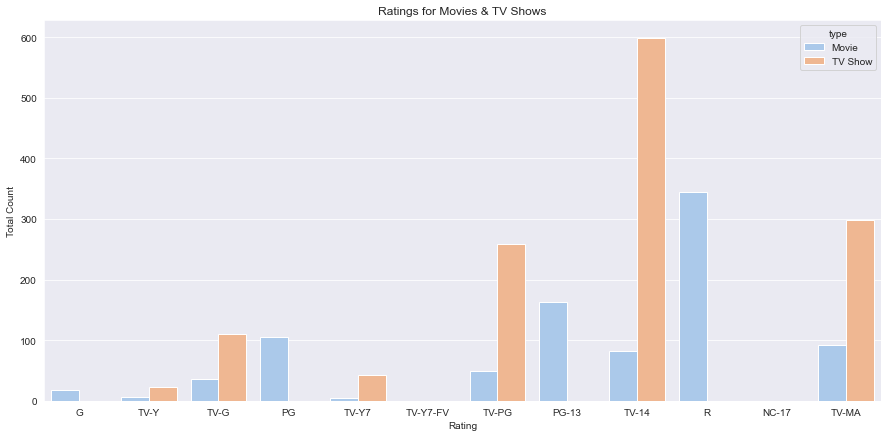

In [21]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(hulu.rating, hue=hulu.type, order=order, palette="pastel");
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()


C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MSI\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


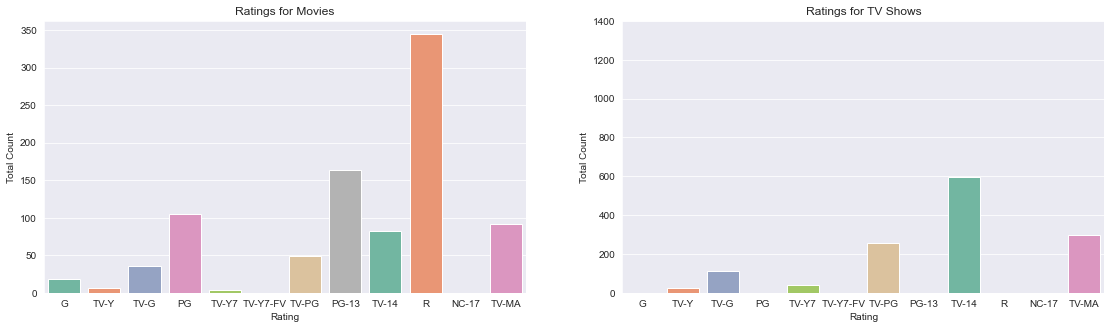

In [22]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(hulu_movies.rating, order=order,palette="Set2", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")
g2 = sns.countplot(hulu_shows.rating, order=order,palette="Set2", ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
fig.show()

In [24]:
hulu['year_added'] = pd.DatetimeIndex(hulu['date_added']).year
hulu_movies['year_added'] = pd.DatetimeIndex(hulu_movies['date_added']).year
hulu_shows['year_added'] = pd.DatetimeIndex(hulu_shows['date_added']).year
hulu['month_added'] = pd.DatetimeIndex(hulu['date_added']).month
hulu_movies['month_added'] = pd.DatetimeIndex(hulu_movies['date_added']).month
hulu_shows['month_added'] = pd.DatetimeIndex(hulu_shows['date_added']).month

In [25]:
hulu_year = hulu['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
hulu_year = hulu_year[hulu_year.year != 2022]
hulu_year

,year,count
0,2021,761
1,2020,687
2,2019,365
3,2018,247
4,2017,195
5,2015,68
6,2016,66
7,2014,49
8,2013,34
9,2012,16


In [26]:
hulu_year2 = hulu[['type','year_added']]
movie_year = hulu_year2[hulu_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2022]
show_year = hulu_year2[hulu_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2022]

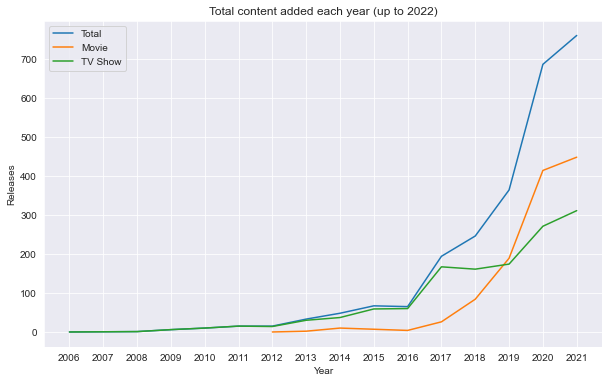

In [28]:
ig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=hulu_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2006, 2022, 1))
plt.title("Total content added each year (up to 2022)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

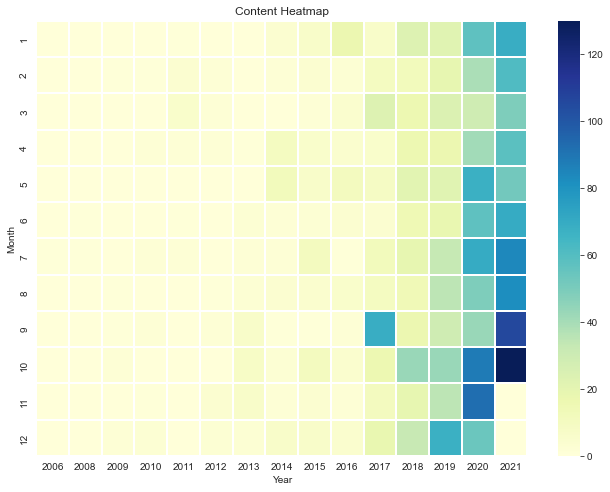

In [29]:
month_year = hulu.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year, linewidths=0.025, cmap="YlGnBu")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

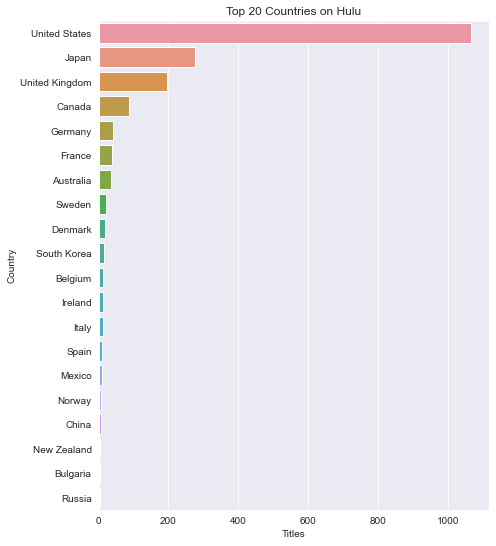

In [31]:
filtered_countries = hulu.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Hulu')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

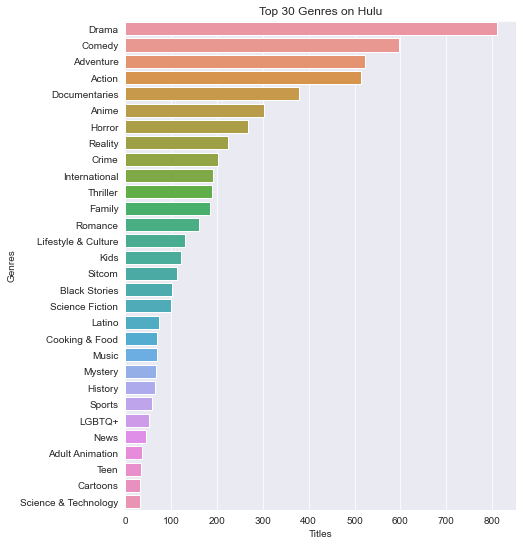

In [32]:
filtered_genres = hulu.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:30])
plt.title('Top 30 Genres on Hulu')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()